# Exploratory Data Analysis

In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
import os
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import *

In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [5]:
import numpy as np

In [6]:
from collections import Counter

In [7]:
import seaborn as sns
import string

In [8]:
from nltk.util import ngrams

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
df_all = pd.read_csv('questions - questions-2.csv')

In [11]:
df_trans_links = pd.read_csv('Questions_links_translations.csv')

In [12]:
df_all.head()

,Year,Month,Question,Answer,Document,URLs
0,2018,12,\n1. Heeft het college kennisgenomen van de ge...,\nNee. \n,https://amsterdam.raadsinformatie.nl/document/...,NaN
1,2018,12,\n2. Kan het college bevestigen of dit lesmate...,"\nNee, het college heeft hier geen zicht op. ...",https://amsterdam.raadsinformatie.nl/document/...,NaN
2,2018,12,\n3. Acht het college het wenselijk dat lesmat...,\nHet CIDI is duidelijk over de eigen doelste...,https://amsterdam.raadsinformatie.nl/document/...,NaN
3,2018,12,\n4. Is het college bekend met de jaarlijks te...,\nHet college heeft hier kennis van genomen. ...,https://amsterdam.raadsinformatie.nl/document/...,NaN
4,2018,12,\n5. Gaat het college zich inspannen om ervoor...,\nNee. De onderwijsinspectie is verantwoordel...,https://amsterdam.raadsinformatie.nl/document/...,NaN


<AxesSubplot:>

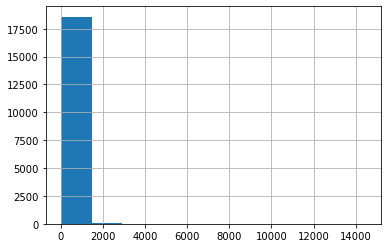

In [13]:
df_all['Question'].str.len().hist()

<AxesSubplot:>

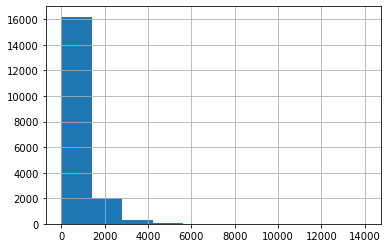

In [14]:
df_all['Answer'].str.len().hist()

<AxesSubplot:>

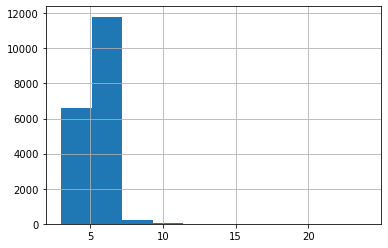

In [15]:
# Avg word len question
df_all['Question'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

In [16]:
df_trans_links.head()

,Unnamed: 0,Year,Month,Question,Answer,Document,URLs,Translated Questions,Translated Answers
0,9,2015,1,\n1. Komt het in Amsterdam al voor dat er gesu...,\nMomenteel vindt er geen gemeentelijk taalaa...,https://amsterdam.raadsinformatie.nl/document/...,http://www.parool.nl/parool/nl/4060/AMSTERDAM-...,1. Does it already happen in Amsterdam that su...,Currently there is no municipal language offer...
1,25,2013,6,\n1. Is het college op de hoogte van het rappo...,"\nJa, het college heeft kennisgenomen van het...",https://amsterdam.raadsinformatie.nl/document/...,http://www.dekinderombudsman.nl/86/volwassen/n...,1. Is the Board aware of the report of the Omb...,"Yes, the Board has taken note of the report. T..."
2,92,2013,9,\n1. Heeft het college kennisgenomen van de be...,\nJa. \n ...,https://amsterdam.raadsinformatie.nl/document/...,http://afvalonline.nl/bericht?id=17424\nhttp:/...,1. Has the Commission taken note of the report...,Yes.\n ...
3,101,2013,7,\n6. Wat gaat het college doen om ervoor te zo...,\nEen klas van 28 leerlingen wordt niet als i...,https://amsterdam.raadsinformatie.nl/document/...,http://www.rekenkamer.nl/Publicaties/Onderzoek...,6. What will the council do to ensure that the...,A class of 28 students is not considered an id...
4,117,2020,4,\n2. Wat doet de gemeente de komende weken om ...,\nNatuurlijke bestrijding \n- Er zijn...,https://amsterdam.raadsinformatie.nl/document/...,https://maps.amsterdam.nl/eikenprocessierups/,2. What will the municipality do about the num...,"Natural control\n- Approx. 3,000 bird nest box..."


# General idea

In [17]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18711 entries, 0 to 18710
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      18711 non-null  int64 
 1   Month     18711 non-null  int64 
 2   Question  18711 non-null  object
 3   Answer    18703 non-null  object
 4   Document  18711 non-null  object
 5   URLs      639 non-null    object
dtypes: int64(2), object(4)
memory usage: 877.2+ KB


In [18]:
questions = df_all['Question']

In [19]:
answers = df_all['Answer']

# Pre-processing

In this section, the questions and answers are pre-processed. The pre-processing step is needed, so that the analysis is performed on data which has less noise (such as stopwords, punctuation etc.)

### Import stopwords

In [20]:
stop = stopwords.words('dutch')

### Tokenize

In [21]:
def tokenize(text):
    """
        Tokenizes the input text.
        Input: text - type(str)
        Output: a list of tokens - type(list)
    """
    tokens = word_tokenize(text, language='dutch')
    return tokens

### Stemming

In [22]:
def stem_token(token): # Doesn't work rn, should check how to do for Dutch
    """
        Stems the given token using the PorterStemmer from the nltk library
        Input: a single token
        Output: the stem of the token
    """
    stemmer = PorterStemmer()
    return stemmer.stem(token)

### Combined

In [23]:
def process_text(text, stop_words, stem=False, remove_stopwords=False, lowercase_text=False):
    """
    Given a string, the function tokenizes
    it and processes it according to the set requirements.
    """
    tokens = []
    for token in tokenize(text):
        if remove_stopwords and token.lower() in stop_words:
            continue
        if stem:
            token = stem_token(token)
        if lowercase_text:
            token = token.lower()
        tokens.append(token)

    return tokens

### Try

In [24]:
process_text(questions[0], stop, stem=False, remove_stopwords=True, lowercase_text=True)

['1', '.', 'college', 'kennisgenomen', 'genoemde', 'publicatie', 'cidi', '?']

# Lengths, Distributions, etc.

In [25]:
questions_prepr = []
questions_len = []
for question in questions:
    preprocessed = process_text(question, stop, remove_stopwords=True)
    questions_prepr.append(preprocessed)
    questions_len.append(len(preprocessed))

In [26]:
questions_len

[8,
 10,
 13,
 29,
 25,
 21,
 14,
 18,
 32,
 14,
 20,
 20,
 30,
 19,
 18,
 22,
 10,
 22,
 19,
 17,
 30,
 23,
 25,
 8,
 18,
 14,
 27,
 15,
 28,
 19,
 37,
 43,
 66,
 8,
 20,
 36,
 31,
 38,
 15,
 24,
 21,
 14,
 13,
 20,
 20,
 24,
 8,
 26,
 13,
 41,
 29,
 17,
 17,
 12,
 24,
 14,
 17,
 25,
 9,
 13,
 19,
 8,
 15,
 11,
 12,
 12,
 26,
 30,
 44,
 20,
 37,
 42,
 38,
 51,
 37,
 25,
 39,
 19,
 10,
 15,
 35,
 18,
 40,
 24,
 14,
 18,
 21,
 23,
 29,
 34,
 25,
 21,
 8,
 17,
 28,
 16,
 6,
 11,
 22,
 11,
 20,
 19,
 8,
 18,
 23,
 30,
 8,
 9,
 8,
 15,
 14,
 12,
 22,
 26,
 34,
 20,
 16,
 16,
 17,
 20,
 12,
 20,
 22,
 26,
 77,
 13,
 22,
 16,
 48,
 16,
 20,
 9,
 12,
 26,
 18,
 32,
 32,
 7,
 36,
 14,
 15,
 19,
 11,
 19,
 10,
 12,
 26,
 38,
 15,
 29,
 37,
 27,
 37,
 23,
 22,
 7,
 18,
 15,
 17,
 25,
 9,
 14,
 21,
 38,
 22,
 29,
 13,
 7,
 7,
 6,
 27,
 27,
 35,
 17,
 32,
 24,
 48,
 33,
 25,
 12,
 15,
 13,
 11,
 26,
 27,
 19,
 22,
 43,
 34,
 13,
 21,
 13,
 22,
 23,
 23,
 22,
 22,
 36,
 19,
 16,
 33,
 67,
 30,
 15,

{'whiskers': [<matplotlib.lines.Line2D at 0x7faa11fe6a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7faa11ff4190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7faa11fe6730>],
 'medians': [<matplotlib.lines.Line2D at 0x7faa11ff4850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7faa11ff4bb0>],
 'means': []}

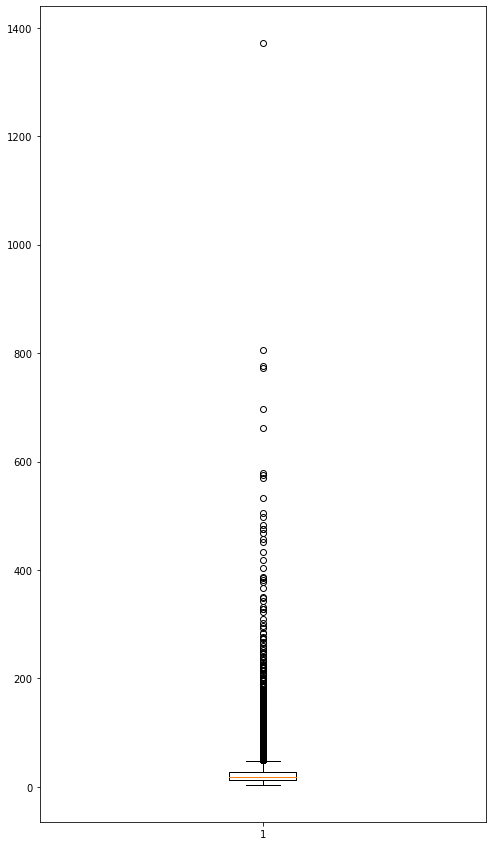

In [27]:
plt.figure(figsize=(8, 15))
plt.boxplot(questions_len)

In [28]:
answers_prepr = []
answers_len = []
for answer in answers:
    preprocessed = process_text(str(answer), stop, remove_stopwords=True)
    answers_prepr.append(preprocessed)
    answers_len.append(len(preprocessed))

In [29]:
answers_len

[2,
 13,
 19,
 60,
 29,
 80,
 38,
 38,
 100,
 69,
 5,
 94,
 50,
 17,
 1,
 41,
 20,
 24,
 36,
 32,
 20,
 42,
 55,
 51,
 35,
 79,
 711,
 101,
 125,
 140,
 118,
 258,
 244,
 10,
 103,
 200,
 16,
 22,
 65,
 67,
 26,
 19,
 149,
 127,
 85,
 213,
 69,
 88,
 11,
 94,
 86,
 38,
 209,
 63,
 70,
 43,
 31,
 44,
 33,
 118,
 46,
 94,
 45,
 178,
 113,
 75,
 161,
 76,
 160,
 6,
 295,
 53,
 38,
 159,
 114,
 36,
 20,
 64,
 34,
 5,
 87,
 28,
 94,
 34,
 1,
 102,
 168,
 93,
 5,
 23,
 33,
 80,
 19,
 165,
 123,
 8,
 6,
 57,
 113,
 102,
 127,
 193,
 152,
 12,
 152,
 59,
 28,
 8,
 30,
 42,
 83,
 24,
 56,
 55,
 99,
 79,
 1,
 258,
 21,
 62,
 34,
 70,
 3,
 80,
 123,
 36,
 24,
 18,
 129,
 103,
 53,
 98,
 5,
 96,
 35,
 64,
 20,
 87,
 82,
 80,
 55,
 1,
 116,
 54,
 49,
 16,
 16,
 39,
 31,
 229,
 16,
 130,
 117,
 14,
 66,
 67,
 119,
 123,
 57,
 29,
 26,
 62,
 47,
 101,
 54,
 32,
 88,
 68,
 19,
 67,
 86,
 28,
 41,
 66,
 75,
 46,
 54,
 8,
 86,
 63,
 59,
 30,
 89,
 30,
 52,
 130,
 63,
 86,
 62,
 11,
 30,
 18,
 118,
 51,


{'whiskers': [<matplotlib.lines.Line2D at 0x7faa321e1f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7faa321f0610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7faa321e1bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7faa321f0cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7faa27c1d070>],
 'means': []}

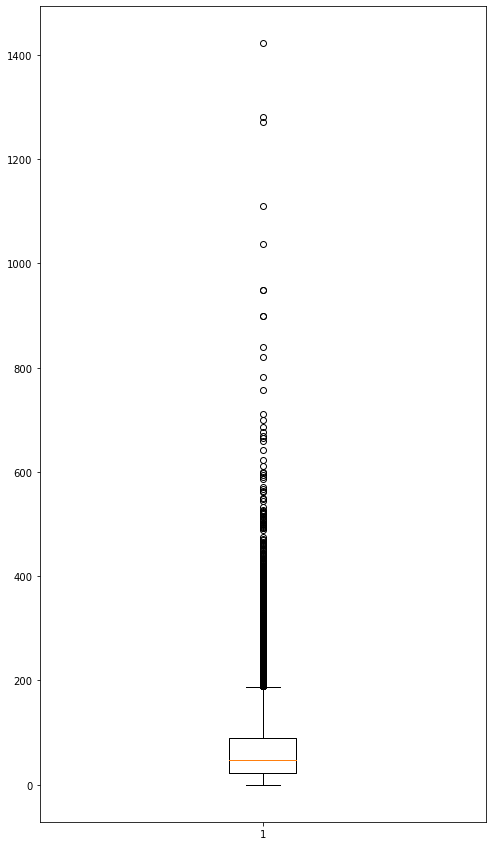

In [30]:
plt.figure(figsize=(8, 15))
plt.boxplot(answers_len)

### Most common words

#### Questions

In [31]:
corpus_q = sum(questions_prepr, [])

In [32]:
translator = str.maketrans('', '', string.punctuation)

# Remove punctuation
corpus_q = [token.translate(translator) for token in corpus_q if token not in string.punctuation]

<AxesSubplot:>

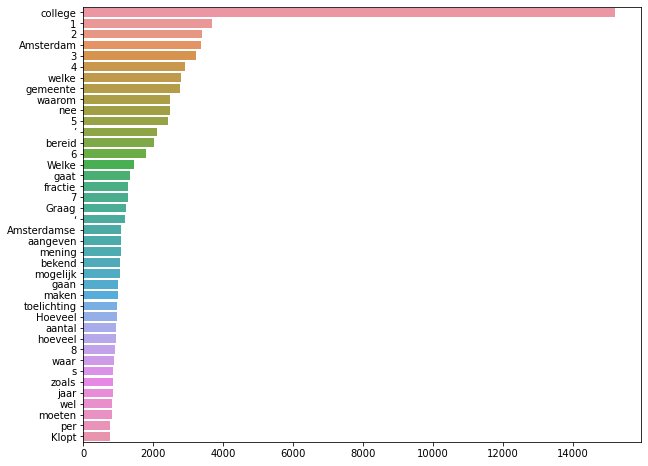

In [33]:
counter=Counter(corpus_q)
most=counter.most_common()

x, y= [], []
plt.figure(figsize=(10, 8))
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

#### Answers 

In [34]:
corpus_a = sum(answers_prepr, [])

translator = str.maketrans('', '', string.punctuation)

# Remove punctuation
corpus_a = [token.translate(translator) for token in corpus_a if token not in string.punctuation]

<AxesSubplot:>

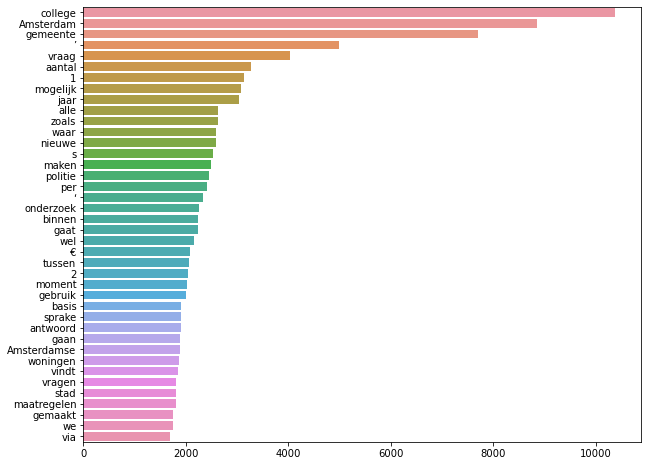

In [35]:
counter=Counter(corpus_a)
most=counter.most_common()

plt.figure(figsize=(10, 8))
x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

#### n-grams

In [36]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

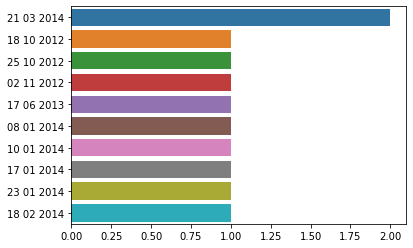

In [37]:
top_n_bigrams=get_top_ngram(corpus_q,3)
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

<AxesSubplot:>

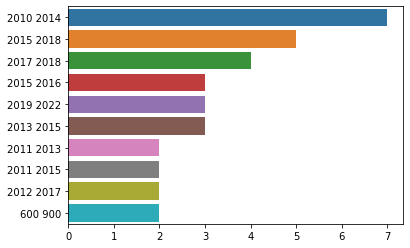

In [38]:
top_n_bigrams=get_top_ngram(corpus_a,2)
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

#### TF-IDF 

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

#### Questions

In [40]:
vectorizer = TfidfVectorizer(ngram_range=(1,3),
                             stop_words = stop,
                             max_df=0.8,
                             min_df=3)

In [41]:
tfidf_q = vectorizer.fit_transform(questions)

In [42]:
feature_names = vectorizer.get_feature_names_out()
tf_idf_sum = tfidf_q.sum(axis=0)
tf_idf_scores = [(feature_names[i], tf_idf_sum[0, i]) for i in range(len(feature_names))]
tf_idf_scores = sorted(tf_idf_scores, key=lambda x: x[1], reverse=True)

# Print the top 10 most important words in the corpus
for term, score in tf_idf_scores[:20]:
    print(f"{term}: {score:.2f}")


college: 699.94
welke: 346.59
amsterdam: 293.03
waarom: 261.03
gemeente: 249.22
nee: 222.35
hoeveel: 205.49
bereid: 195.34
nee waarom: 181.95
college bereid: 175.58
gaat: 151.88
bekend: 151.00
graag: 144.64
fractie: 138.55
aangeven: 127.79
mening: 126.32
amsterdamse: 123.32
toelichting: 120.80
klopt: 117.21
gaan: 115.37


#### Answers

In [43]:
answers.isnull().values.any()

True

In [44]:
answers.isnull().sum()

8

In [45]:
answers = answers.dropna()

In [46]:
vectorizer = TfidfVectorizer(ngram_range=(1,3),
                             stop_words = stop,
                             max_df=0.7,
                             min_df=3)
tfidf_a = vectorizer.fit_transform(answers)

In [47]:
feature_names = vectorizer.get_feature_names_out()
tf_idf_sum = tfidf_a.sum(axis=0)
tf_idf_scores = [(feature_names[i], tf_idf_sum[0, i]) for i in range(len(feature_names))]
tf_idf_scores = sorted(tf_idf_scores, key=lambda x: x[1], reverse=True)

# Print the top 10 most important words in the corpus
for term, score in tf_idf_scores[:50]:
    print(f"{term}: {score:.2f}")



college: 399.90
vraag: 333.40
zie: 309.82
amsterdam: 304.28
antwoord: 267.45
gemeente: 267.05
zie antwoord: 238.85
antwoord vraag: 238.61
zie antwoord vraag: 222.49
nee: 165.56
politie: 150.02
zoals: 146.46
aantal: 135.17
mogelijk: 130.25
bekend: 129.49
onderzoek: 121.34
alle: 121.04
jaar: 118.74
nieuwe: 117.96
wel: 117.70
waar: 116.97
vragen: 112.03
binnen: 110.24
maken: 107.82
beantwoording: 107.59
per: 107.08
we: 103.95
moment: 103.21
gaat: 102.03
stadsdeel: 100.94
gebruik: 100.15
sprake: 99.86
woningen: 98.97
gemeente amsterdam: 98.67
nl: 98.00
vindt: 97.94
stad: 95.20
tussen: 92.51
gaan: 91.35
maatregelen: 90.44
via: 89.96
amsterdamse: 89.37
2019: 88.35
informatie: 87.18
basis: 87.11
gemaakt: 83.96
2015: 82.67
burgemeester: 81.91
2018: 81.61
nodig: 80.90


### Topic Modeling 

In [48]:
import gensim

In [49]:
nopunct_a = []
for answ in answers_prepr:
    nopunct_a.append([token.translate(translator) for token in answ if token not in string.punctuation])

In [50]:
dic=gensim.corpora.Dictionary(nopunct_a)
bow_corpus = [dic.doc2bow(doc) for doc in nopunct_a]

In [51]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 10,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.019*"woningen" + 0.012*"woning" + 0.009*"corporaties" + 0.008*"huurders" + 0.008*"sociale" + 0.008*"huurwoningen" + 0.007*"huur" + 0.006*"afval" + 0.005*"gemeente" + 0.005*"aantal"'),
 (1,
  '0.012*"Amsterdam" + 0.010*"scholen" + 0.010*"college" + 0.007*"onderwijs" + 0.006*"gemeente" + 0.006*"school" + 0.005*"gesprek" + 0.005*"’" + 0.005*"leerlingen" + 0.005*"Amsterdamse"'),
 (2,
  '0.020*"vraag" + 0.019*"€" + 0.017*"1" + 0.013*"antwoord" + 0.013*"Zie" + 0.012*"per" + 0.011*"jaar" + 0.010*"2" + 0.008*"3" + 0.007*"2015"'),
 (3,
  '0.009*"dieren" + 0.008*"s" + 0.007*"’" + 0.005*"GVB" + 0.005*"college" + 0.004*"voertuigen" + 0.004*"dierenwelzijn" + 0.004*"auto" + 0.004*"aantal" + 0.003*"−"'),
 (4,
  '0.010*"gemeente" + 0.010*"college" + 0.009*"Amsterdam" + 0.006*"zorg" + 0.005*"we" + 0.005*"mogelijk" + 0.005*"mensen" + 0.004*"waar" + 0.004*"GGD" + 0.004*"maken"'),
 (5,
  '0.013*"Amsterdam" + 0.012*"college" + 0.008*"gemeente" + 0.008*"’" + 0.005*"nieuwe" + 0.004*"stad" + 0.004*"

0) 0.019*"district" + 0.012*"•" + 0.006*"Center" + 0.006*"hour" + 0.006*"Southeast" + 0.005*"residents" + 0.005*"North" + 0.005*"District" + 0.005* "West" + 0.004*"2020"')

1) 0.017*"Amsterdam" + 0.008*"college" + 0.006*"'" + 0.006*"municipality" + 0.004*"new" + 0.004*"Amsterdam" + 0.004*"city" + 0.004*"s" + 0.003* "like" + 0.003*"area

2) 0.018*"€" + 0.009*"college" + 0.008*"per" + 0.007*"Amsterdam" + 0.006*"costs" + 0.006*"1" + 0.006*"municipality" + 0.005*"2014" + 0.005* "year" + 0.005*"2015

3) '0.031*"question" + 0.021*"answer" + 0.019*"lecture" + 0.017*"See" + 0.011*"1" + 0.011*"municipality" + 0.009*"building" + 0.009*"2" + 0.008 *"Amsterdam" + 0.008*"answer"

4) 0.013*"homes" + 0.009*"college" + 0.006*"home" + 0.005*"number" + 0.005*"year" + 0.005*"residents" + 0.004*"municipality" + 0.004*"per" + 0.004* "corporations" + 0.004*"new"

In [52]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 20,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2)

In [53]:
lda_model.show_topics(20)

[(0,
  '0.017*"bewoners" + 0.007*"onderhoud" + 0.007*"aanpak" + 0.006*"Ymere" + 0.006*"ruimte" + 0.005*"waar" + 0.005*"plan" + 0.005*"AEB" + 0.004*"nieuwe" + 0.004*"stad"'),
 (1,
  '0.022*"college" + 0.018*"pand" + 0.012*"eigenaar" + 0.007*"gebruik" + 0.006*"opvang" + 0.005*"krakers" + 0.005*"waar" + 0.004*"mogelijk" + 0.004*"bekend" + 0.004*"aangifte"'),
 (2,
  '0.031*"’" + 0.025*"s" + 0.008*"‘" + 0.007*"gebruik" + 0.006*"politie" + 0.006*"college" + 0.005*"onderzoek" + 0.004*"risico" + 0.003*"zoals" + 0.003*"artikel"'),
 (3,
  '0.045*"−" + 0.037*"stadsdeel" + 0.015*"Centrum" + 0.014*"Zuidoost" + 0.012*"West" + 0.008*"Stadsdeel" + 0.007*"gebruik" + 0.007*"stadsdelen" + 0.007*"Noord" + 0.006*"’"'),
 (4,
  '0.029*"€" + 0.015*"kosten" + 0.011*"eigen" + 0.010*"bedrag" + 0.008*"klanten" + 0.007*"betalen" + 0.007*"regeling" + 0.007*"per" + 0.007*"ontvangen" + 0.006*"1"'),
 (5,
  '0.008*"boete" + 0.007*"boetes" + 0.006*"handhaving" + 0.006*"opgelegd" + 0.005*"GVB" + 0.005*"handhavers" + 0.00

### Locating Outliers 

#### Questions

In [54]:
df_all['Question Len'] = questions_len

In [55]:
df_all['Answer Len'] = answers_len

In [56]:
df_all.describe()

,Year,Month,Question Len,Answer Len
count,18711.000000,18711.000000,18711.000000,18711.000000
mean,2017.763668,6.312062,24.208166,68.671049
std,2.623608,3.301498,29.552537,74.425422
min,2013.000000,1.000000,4.000000,0.000000
25%,2015.000000,4.000000,13.000000,23.000000
50%,2018.000000,6.000000,19.000000,48.000000
75%,2020.000000,9.000000,27.000000,89.000000
max,2022.000000,12.000000,1371.000000,1422.000000


Mean is very different from the max values, which indicates outliers, regardless of the fact that mean is highly affected by extreme values. 

In [57]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    
    q3=df.quantile(0.75)
    
    IQR=q3-q1
    
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    
    return outliers

In [58]:
outliers_q = find_outliers_IQR(df_all['Question Len']).sort_values()

In [59]:
outliers_a = find_outliers_IQR(df_all['Answer Len']).sort_values()

In [60]:
print(len(outliers_q))
print(len(outliers_a))

1016
1096


The number of outliers for questions and answers is very similar -> it is likely that the same docs are not being parsed correctly 

In [61]:
outliers_q[-50:]

10061     246
5258      247
12585     249
306       253
3307      257
1674      259
18644     266
16353     267
15840     272
15549     275
8827      277
14501     283
14509     283
10805     293
10175     297
9600      303
18675     310
5942      323
824       328
5488      329
13157     332
5253      342
14056     349
5512      350
13426     367
10444     377
5183      381
17513     386
15960     387
2503      403
9073      419
10823     434
15395     452
7199      458
1952      469
4096      475
5256      476
8161      483
324       497
6986      505
16829     532
684       570
16111     576
8230      578
17670     661
11098     696
2482      772
8558      776
5184      806
5066     1371
Name: Question Len, dtype: int64

In [62]:
df_all.iloc[5066]['Question'] # Example of an outlier question

'\n1. Is het college bekend met deze klachten? Zijn deze klachten het college eerder ter ore \ngekomen? Is het college bereid om (via DENK) in contact te treden met deze ouders en hun \nklachten goed te onderzoeken?  \n \n  \n \n15 september 2021 \nEen routebeschrijving vindt u op amsterdam.nl \nHet college vindt het belangrijk dat ouders goed worden betrokken bij de schoolloopbaan van \nhun kinderen. Ouders kunnen hun kind op die manier beter ondersteunen. Leden Yilmaz en \nKhan hebben deze klachten eerder benoemd tijdens vergaderingen van de commissie Werk, \nInkomen en Onderwijs. Het college heeft echter geen bevoegdheid in de afhandeling van \ndergelijke klachten. Daarom heeft het college eerder verwezen naar ondersteuning van het \nOCO (Onderwijs Consumenten Organisatie). OCO geeft uitgebreide informatie en advies, en \nondersteunt ouders bij klachten.  \n \n2. Op welke specifieke wijze wordt getracht om laaggeletterde ouders te ondersteunen bij de \nontwikkeling van hun kind op d

In [63]:
outliers_a[-50:]

7692      507
11100     507
14692     507
12816     509
13875     513
5940      513
5012      514
5693      516
6711      520
5394      521
684       522
12400     524
2858      525
8646      527
2556      532
6859      545
5023      548
12222     550
7677      561
4061      564
13820     568
3272      571
1883      586
13564     591
13445     594
16596     598
1028      600
7340      612
376       623
10042     642
3389      660
17192     665
13648     669
238       677
14468     686
4683      700
26        711
17649     758
16917     783
463       821
18010     840
2934      900
12164     900
3726      950
10132     950
9408     1038
2240     1111
1359     1271
17260    1281
9600     1422
Name: Answer Len, dtype: int64

In [64]:
df_all.iloc[9600]['Question'] # Example of an outlier answers

'\n1. de grootte van de uitstoot van het kankerverwekkende benzeen;   \n2. de bijdrage die 2-taktscooters leveren aan de vorming van nieuwe ultrafijn \nstofdeeltjes (door chemische reacties in de lucht van de uitgestoten \ngasvormige verbindingen);  \n3. het radicaalvormend vermogen van het ultrafijn stof (een maat voor de \nschadelijkheid). \n \nHoe groot het gezondheidsrisico is, is niet onderzocht. Het artikel maakt wel \naannemelijk dat het gezondheidsrisico van fietsen achter een tweetakt scooter, \nom bovengenoemde redenen groter is dan tot nu toe verondersteld.  \n \nUit ander onderzoek zijn er veel aanwijzingen dat ultrafijn stof negatieve effecten \nheeft op de gezondheid: hoe kleiner de deeltjes hoe schadelijker voor de \ngezondheid in het algemeen. Van benzeen is bekend dat het kankerverwekkend \nis en daarom is het volgens WHO en GGD van belang de blootstelling hieraan zo \nlaag mogelijk te houden, aangezien ook lage concentraties nog steeds een risico \nvormen. Uitstoot va

In [65]:
df_all.iloc[9600]['Answer'] # Example of an outlier answers

' vragen 4 t/m 8:  \nDit onderzoek bevestigt dat de inzet van het College om de scooter naar \nde rijbaan te verplaatsen ook vanuit gezondheidsperspectief belangrijk is. \nHoe groter de afstand tussen scooter en een fietser/wandelaar, hoe minder de \nfietser/wandelaar wordt blootgesteld en hoe minder de gezondheidsschade.  \n \nZoals bekend, loopt op dit moment een onderzoek naar de kosten en baten van \nversnelde uitfasering van tweetakt scooters door het instellen van low key \nmilieuzone voor deze scooters. Voor een schets van de vormgeving van \nde milieuzone die momenteel onderzocht wordt, wordt verwezen naar bijlage 1. \nHet is ons inziens aan het volgende college om op basis van die \nonderzoeksresultaten en de gegevens over autonome uitfasering een afweging te \nmaken of en zo ja welke extra maatregelen nodig zijn. Er zal door Wethouder van \nPoelgeest nog wel een gesprek worden georganiseerd met de Branchevereniging \nRAI en Bovag om met deze beide partijen van gedachte te wis

After checking this answer might actually not be wrongly parsed. (Need to check in detail). -> The college seems to have answered all four questions in one answer 

### URLs inspection

In [66]:
from collections import Counter

In [67]:
df_trans_links.head()

,Unnamed: 0,Year,Month,Question,Answer,Document,URLs,Translated Questions,Translated Answers
0,9,2015,1,\n1. Komt het in Amsterdam al voor dat er gesu...,\nMomenteel vindt er geen gemeentelijk taalaa...,https://amsterdam.raadsinformatie.nl/document/...,http://www.parool.nl/parool/nl/4060/AMSTERDAM-...,1. Does it already happen in Amsterdam that su...,Currently there is no municipal language offer...
1,25,2013,6,\n1. Is het college op de hoogte van het rappo...,"\nJa, het college heeft kennisgenomen van het...",https://amsterdam.raadsinformatie.nl/document/...,http://www.dekinderombudsman.nl/86/volwassen/n...,1. Is the Board aware of the report of the Omb...,"Yes, the Board has taken note of the report. T..."
2,92,2013,9,\n1. Heeft het college kennisgenomen van de be...,\nJa. \n ...,https://amsterdam.raadsinformatie.nl/document/...,http://afvalonline.nl/bericht?id=17424\nhttp:/...,1. Has the Commission taken note of the report...,Yes.\n ...
3,101,2013,7,\n6. Wat gaat het college doen om ervoor te zo...,\nEen klas van 28 leerlingen wordt niet als i...,https://amsterdam.raadsinformatie.nl/document/...,http://www.rekenkamer.nl/Publicaties/Onderzoek...,6. What will the council do to ensure that the...,A class of 28 students is not considered an id...
4,117,2020,4,\n2. Wat doet de gemeente de komende weken om ...,\nNatuurlijke bestrijding \n- Er zijn...,https://amsterdam.raadsinformatie.nl/document/...,https://maps.amsterdam.nl/eikenprocessierups/,2. What will the municipality do about the num...,"Natural control\n- Approx. 3,000 bird nest box..."


In [68]:
urls = df_trans_links['URLs']

In [69]:
Counter(urls).most_common(17)

[('https://www.rijksoverheid.nl/documenten/kamerstukken/2021/07/06/kamerbrief-over-de-gevolgen-van-de-uitspraak-van-de-raad-van-state-over-de-milieubeoordeling-voor-\nhttps://www.infomil.nl/onderwerpen/integrale/uitspraak-raad-state/gevolgen-raad-state-uitspraak-windturbineparken/uitspraak-raad-state/',
  5),
 ('https://www.ggd.amsterdam.nl/gezond-wonen/loden-waterleidingen/meest-gestelde-vragen-over-gezondheid-en/',
  2),
 ('https://www.regionale-energiestrategie.nl/vragen/vragen', 2),
 ('https://www.amsterdam.nl/bestuur-organisatie/volg-beleid/stad-in-balans/geluidsoverlast/',
  2),
 ('https://www.rvo.nl/onderwerpen/duurzaam-ondernemen/duurzame-energie-opwekken/windenergie-op-land/milieu-en-omgeving/natuur-en-',
  2),
 ('https://www.jaarverantwoordingzorg.nl/gegevens-bekijken/verantwoordingsgegevens-per-instelling',
  2),
 ('https://www.amsterdam.nl/zorg-ondersteuning/contact/meldpunt-zorg/', 2),
 ('https://www.cbs.nl/nl-nl/corporate/2019/32/onderzoek-naar-eerlijke-algoritmen-voor-be

Check if the ones that appear more than once are connectes to the same documents/ or if there is a mistake

**e.g. the most common link seems to be a mistake (It looks like 2 links are combined together)**

### Check broken links

In [70]:
import requests
from bs4 import BeautifulSoup

In [71]:
broken_links=[]
for url in urls:
    try:
        r = requests.head(url)
        if r.status_code == 404:
            broken_links.append(url)
    except requests.exceptions.ConnectionError:
        broken_links.append('Connection refused')
    except requests.exceptions.InvalidURL:
            broken_links.append('Invalid URL')

In [72]:
len(broken_links)

144

There are (maybe) 143 broken/not accessible links 

In [73]:
mask = df_trans_links['URLs'].isin(broken_links) # doesn't check for "Connection refused"

In [74]:
index_list = df_trans_links[mask].index.tolist()
index_list

[5,
 16,
 17,
 28,
 29,
 32,
 49,
 60,
 61,
 64,
 65,
 71,
 75,
 76,
 80,
 85,
 87,
 92,
 95,
 100,
 104,
 106,
 109,
 115,
 116,
 118,
 122,
 129,
 140,
 142,
 143,
 147,
 148,
 149,
 151,
 154,
 156,
 164,
 165,
 173,
 177,
 179,
 199,
 205,
 206,
 208,
 210,
 218,
 221,
 229,
 233,
 237,
 241,
 255,
 263,
 264,
 265,
 268,
 275,
 281,
 284,
 294,
 297,
 298,
 309,
 310,
 311,
 312,
 316,
 317,
 323,
 324,
 325,
 331,
 336,
 337,
 338,
 339,
 343,
 344,
 356,
 358,
 369,
 370,
 373,
 379,
 383,
 392,
 393,
 396,
 405,
 423,
 429,
 430,
 431,
 440,
 448,
 454,
 456,
 464,
 469,
 471,
 476,
 477,
 483,
 493,
 508,
 510,
 515,
 519,
 522,
 537,
 539,
 547,
 548,
 550,
 564,
 565,
 568,
 579,
 582,
 586,
 602,
 620,
 626,
 627,
 629,
 632]

In [75]:
df_trans_links['URLs'][5] # there is a fullstop

'https://www.rivm.nl/coronavirus-covid-19/onderzoek.'

In [76]:
df_trans_links['URLs'][76] # they are concat.

'https://www.actiz.nl/web/ouderenzorg/kwaliteit/onderwerp/pag/veiligheid/open/in-de-hitte-van-de-dag\nhttps://www.ggd.amsterdam.nl/gezond-wonen/hittetips/'

In [77]:
df_trans_links['URLs'][100] # ends with a dash

'https://www.rijksoverheid.nl/binaries/rijksoverheid/documenten/kamerstukken/2017/03/23/beantwoordingkamervragen-arbeidsomstandigheden-primark/beantwoording-kamervragen-'

In [78]:
df_trans_links['URLs'][264] # ends with ).

'https://www.parool.nl/es-bb2825c9).'

In [79]:
df_trans_links['URLs'][275] 

'https://www.parool.nl/nederland/energiekosten-fors-hoger-veel-mensen-betalen-nu-200-euro-per-maand-te-'

In [82]:
df_trans_links['URLs'][620]

'https://api.notubiz.nl/documents/8767170/2/file?version=2.0.0&open=browser&token='

### Spot opinion-seeking questions & Human judgemnt answers

### Check question types